# NumPy

In [2]:
import cv2

%matplotlib notebook
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Images as NumPy arrays

- OpenCV `imread` under Python returns a **NumPy array**
- The `shape` atribute keeps the array's dimensions

In the OpenCV’s Python wrapper, the `imread` function returns an image as a NumPy array. The array dimensions can be read from the `shape` attribute:

In [4]:
lenna = cv2.imread('data/lenna.tiff', cv2.IMREAD_GRAYSCALE)
lenna.shape

(512, 512)

- Grayscale images can be represented as `uint8` arrays

Grayscale images are commonly represented by 2D arrays of 8 bits unsigned integers, corresponding to values from 0 ("black") to 255 ("white"). In NumPy, this **data type** (`dtype`) is named `uint8`.

In [5]:
lenna.dtype

dtype('uint8')

In [6]:
lenna

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [7]:
lenna[0,0]

162

<IPython.core.display.Javascript object>


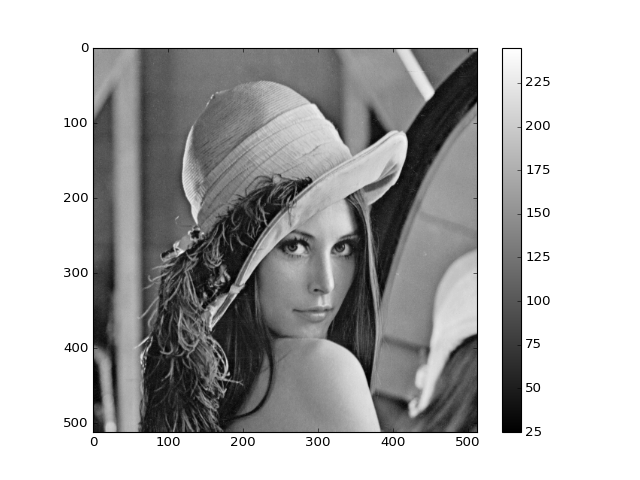

In [11]:
plt.imshow(lenna, cmap=plt.cm.gray)
plt.colorbar()

### Color images

- A RGB color image can be represented by a $M \times N \times 3$ `uint8` array

Color images in RGB are commonly represented by 24 bits, 8 bits for each one of the three channels (red, green and blue). In NumPy, a $M \times N$ color image can be represented by a $M \times N \times 3$ `uint8` array.

In [12]:
mandrill = cv2.imread('data/mandrill.tiff')
mandrill.shape

(512, 512, 3)

In [13]:
mandrill.dtype

dtype('uint8')

In [14]:
mandrill[2,3]

array([29, 46, 54], dtype=uint8)

- The **color triplet** can be retrived indexing the pixel position
- Indexing can be used to retrieve a specifig channel
- OpenCV `imread` returns color images in BGR order

The output of the last command above shows the value at pixel $(2, 3)$ is 29, 46, 54. The image was loaded by OpenCV using the `imread` procedure. OpenCV loads color images in BGR
order, so 29, 46 and 54 correspond to the values of blue, green and red respectively. The
triplet is returned as a 3-d vector (a unidimensional array). Direct access to the color value can be done indexing the color dimension - `mandrill[2,3,1]` returns the green channel
value, 46.

In [15]:
mandrill[2,3,1]

46

<IPython.core.display.Javascript object>


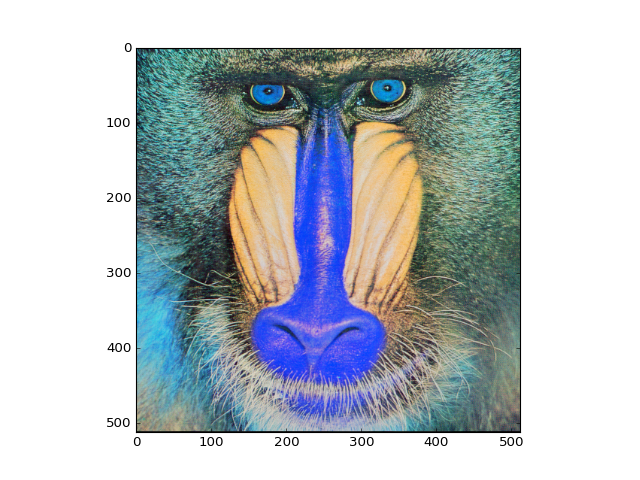

In [17]:
plt.imshow(mandrill)

<IPython.core.display.Javascript object>


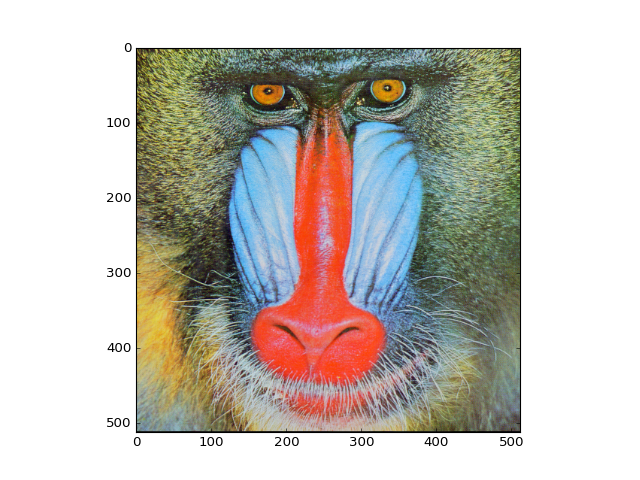

In [19]:
mandrill_rgb = cv2.cvtColor(mandrill, cv2.COLOR_BGR2RGB)
plt.imshow(mandrill_rgb)

### Other data types

- Images are not limited to the *unsigned integer* data type
- Negative integers or real values can result from operators
    - Example: Sobel's convolution
- Thermography
    - Pixels' values can be **floating point** temperatures in °C
- Depth images
    - Pixels's values are distances

Images are not limited to non-negative integer types. Image convolutions can produce negative integers or real values. For example, the Sobel convolution kernel produces negative values representing the derivatives.

<IPython.core.display.Javascript object>


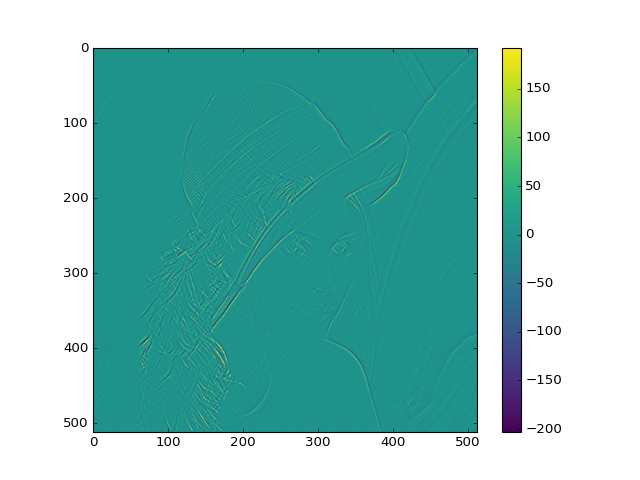

In [22]:
sobel = cv2.Sobel(lenna, cv2.CV_16SC1, 1, 1)
plt.imshow(sobel, cmap=plt.cm.viridis)
plt.colorbar()

In [23]:
sobel[100,100]

-8

<IPython.core.display.Javascript object>


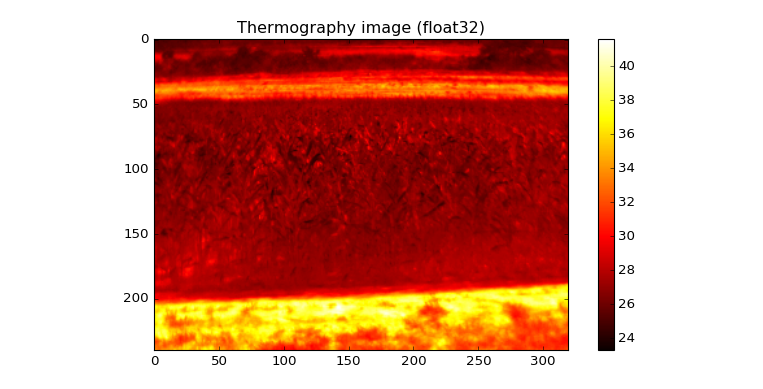

In [26]:
import numpy as np
thermo = np.loadtxt('data/thermo-maize.csv', delimiter=';')
plt.title(r'Thermography image (float32)')
plt.imshow(thermo, cmap=plt.cm.hot)
plt.colorbar()

## Slicing

- **Slicing** can retrieve *parts* of an array
- Employs the convention *start:stop:step*

As seen previously in the *Mandrill* example, array’s elements can be indexed using the `[]` operator. Standard Python *slicing* can also be employed to retrieve parts of an array. Slicing employs the convention *start:stop:step*. For example, to retrieve the rows 3 to 9 of an bi-dimensional array $A$, the code `A[3:10,:]` is used (note *stop* is non-inclusive). In a similar way, to also limit the columns to the range 5 to 8, A[3:10,5:9] is employed. Consider the user is only interested in rows 3, 5, 7 and 9. She could use a step equal to 2, producing `A[3:10:2,5:9]`.

In [28]:
A = np.arange(100).reshape(10,10)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [29]:
A[3:10:2,5:9]

array([[35, 36, 37, 38],
       [55, 56, 57, 58],
       [75, 76, 77, 78],
       [95, 96, 97, 98]])

## Example 1 - Thresholding and fancy indexing

A NumPy array can also be indexed by masks, defined as boolean or integer arrays. This approach is frequently called **fancy indexing**. In this example, a boolean mask is produced applying a logical operation on an array.

In [30]:
lenna > 128

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

The `zeros_like` function is employed to produce an array presenting the same dimensions of the input *Lenna* image, but all pixels values set to zero. Combined to the attribution operation in the last line, the code produces the matrix `res` defined by:  

\begin{equation}
  \mbox{res}[i,j] = \left\{ \begin{array}{ll}
      255 & \mbox{if lenna$[i,j] > 128$},\\
      0 & \mbox{otherwise.}
    \end{array} \right. 
\end{equation}

In [32]:
res = np.zeros_like(lenna)
res[lenna > 128] = 255

<IPython.core.display.Javascript object>


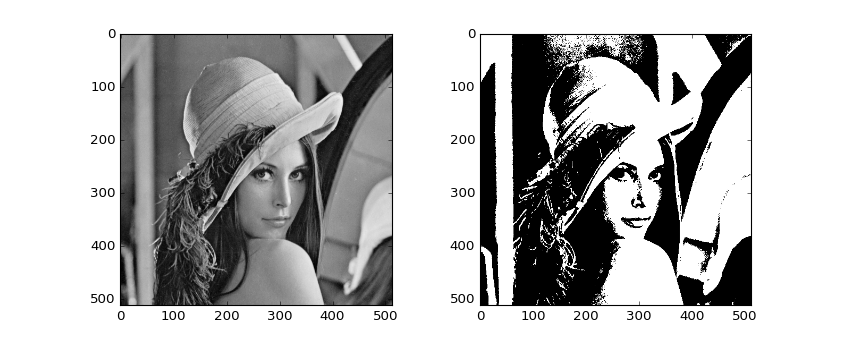

In [34]:
plt.subplot(1,2,1)
plt.imshow(lenna, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(res, cmap=plt.cm.binary_r)

## Example 2 - Whitening

- Problem: *low constrast images*
  - Ambient light intensity
  - Camera gain

Factors as ambient light intensity or the camera gain produce variations in the image contrast. These factors can be compensated by *whitening*, a per-pixel operation that normalizes the intensity, producing a zero mean image that presents unit variance. This example show as whitening can be efficiently performed by vectorized operations, but keeping the same simplicity of its mathematical definition.

<IPython.core.display.Javascript object>


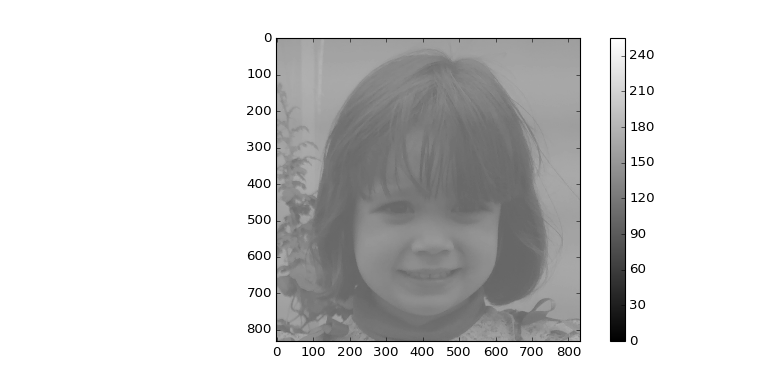

In [37]:
I = cv2.imread('data/girl.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(I, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()

- Solution: **whitening** produces a zero mean, unit variance image

\begin{equation}
  W_I[i,j] = \frac{I[i,j] - \mu_I}{\sigma_I}.
\end{equation}

- NumPy can perform such a *pixel-based* operation efficiently
  - **Vectorized operations**

Let $\mu_I$ and $\sigma_I$ be the mean and the standard deviation of a grayscale image $I$. The whitening operation is defined by:

\begin{equation}
  W_I[i,j] = \frac{I[i,j] - \mu_I}{\sigma_I}.
\end{equation}

In [39]:
mu_I = np.mean(I)
sigma_I = np.std(I)
W_I = (I - mu_I)/sigma_I

NumPy is able to perform *scalar-array operations*. In the code example above, all elements are subtracted by a scalar, $\mu_I$ , and the resulting array is divided by another scalar, $\sigma_I$. Below, pixels' values are converted to the [0, 255] range for 8 bits representation.

<IPython.core.display.Javascript object>


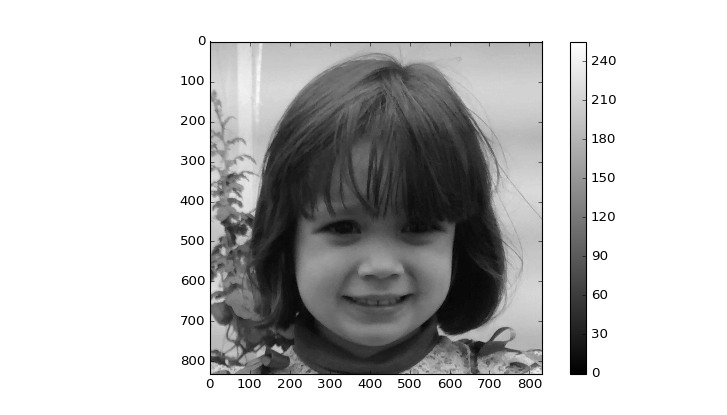

In [44]:
delta_W = W_I.max() - W_I.min()
W_uint8 = np.array(255./delta_W * (W_I - W_I.min()), dtype=np.uint8)
plt.imshow(W_uint8, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()

## Image ROIs and array views

- In NumPy arrays, regions of interest are named **views**
- An array $A$ and a *view on* $A$, share the same memory
- Changes in the view produces changes in $A$

Sometimes, procedures must to be limited to a region of interest (ROI), a rectangular part of the image. In NumPy, the ROI is equivalent to the idea of **view**, an array sharing memory with another one. In the example below, $B$ is *a view on* array $A$. As expected, changes in B values produce the same change in $A$.

In [46]:
A = np.arange(25).reshape(5,-1)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [47]:
B = A[0:3,0:3]
B

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [48]:
B[0,0] = 255
B

array([[255,   1,   2],
       [  5,   6,   7],
       [ 10,  11,  12]])

In [49]:
A

array([[255,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])

- User can **copy** an array
- The new array will not share memory with the original one

Otherwise, if the $A$ must be preserved of any change in $B$, a *copy of A* is necessary. In the example below, the `copy` method allocates more memory, data is copied and $A$ and $B$ do not share any memory.

In [50]:
B = A[0:3,0:3].copy()
B[0,0] = 128
B

array([[128,   1,   2],
       [  5,   6,   7],
       [ 10,  11,  12]])

In [51]:
A

array([[255,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24]])

### Reshaping

Consider the [UCI ML hand-written digits datasets](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

In [52]:
from sklearn import datasets
digits = datasets.load_digits()
digits['data'].shape

(1797, 64)

In [53]:
print digits['DESCR']

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [54]:
x = digits['data'][0]
x

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

- Each row in the data array is a **64-d feature vector** corresponding to a **handwritten digit**

<IPython.core.display.Javascript object>


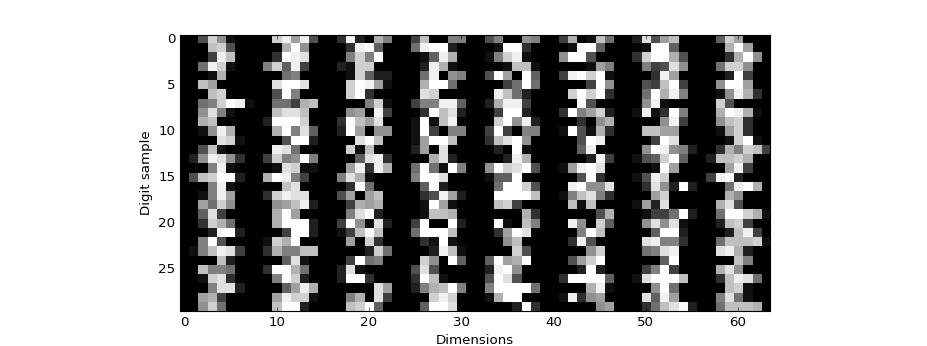

In [55]:
plt.imshow(digits['data'][0:30,:], interpolation='nearest', cmap=plt.cm.gray)
plt.xlabel('Dimensions')
plt.ylabel('Digit sample')

- **Reshaping** produces a view on the original array
- The view presents the **same number of elements**, but different dimensions

*Reshaping* is other operation that produces a view on an array. The reshaped array
is a view presenting the same number of elements, but different dimensions. As an exam-
ple, consider the Handwritten Digits Data Set in the UCI Machine Learning Repository. In the handwritten digits classification problem, the $N \times N$ images are usually
transformed in $N$ 2-d feature vectors for supervised machine learning. A 64-d feature vector $\mathbf{x}$ can be viewed as a $8 \times 8$ image by:

In [56]:
X = x.reshape(8,8)
X

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

<IPython.core.display.Javascript object>


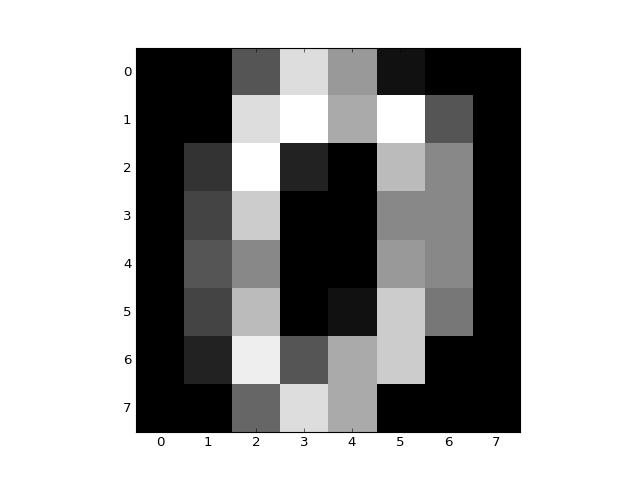

In [59]:
plt.imshow(X, interpolation='nearest', cmap=plt.cm.gray)

Similarly, a $8 \times 8$ image can be viewed as a 64-d vector using:

In [61]:
x = X.reshape(-1)
x

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])